# Sentiment Analysis


In [1]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.tokenize import word_tokenize
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('dataset_tweet_sentimen_tayangan_tv.csv')

In [3]:
data

,Id,Sentiment,Acara TV,Jumlah Retweet,Text Tweet
0,1,positive,HitamPutihTransTV,12,"Undang @N_ShaniJKT48 ke hitamputih, pemenang S..."
1,2,positive,HitamPutihTransTV,6,Selamat berbuka puasa Semoga amal ibadah hari ...
2,3,positive,HitamPutihTransTV,9,"Ada nih di trans7 hitam putih, dia dpt penghar..."
3,4,positive,HitamPutihTransTV,2,selamat ya mas @adietaufan masuk hitamputih
4,5,positive,HitamPutihTransTV,1,Asiknya nonton Hitam Putih Trans7
...,...,...,...,...,...
395,396,negative,MataNajwaMetroTV,0,ini apa banget deh gw paling kesel klo orang2 ...
396,397,negative,MataNajwaMetroTV,0,Orang miskin semakin miskin klo sekolah melaku...
397,398,negative,MataNajwaMetroTV,0,"ga boLeh emosi, cepat tua, nonton #matanajwame..."
398,399,negative,MataNajwaMetroTV,0,dr penampilan saja kyk preman taunya bkin kisr...


## Data Cleaning


In [4]:
data.columns

Index(['Id', 'Sentiment', 'Acara TV', 'Jumlah Retweet', 'Text Tweet'], dtype='object')

In [5]:
data.isnull().sum()

Id                0
Sentiment         0
Acara TV          0
Jumlah Retweet    0
Text Tweet        0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data[data['Sentiment'] == '']

,Id,Sentiment,Acara TV,Jumlah Retweet,Text Tweet


In [8]:
data[data['Text Tweet'] == '']

,Id,Sentiment,Acara TV,Jumlah Retweet,Text Tweet


In [9]:
data.shape

(400, 5)

In [10]:
data['Text Tweet']

0      Undang @N_ShaniJKT48 ke hitamputih, pemenang S...
1      Selamat berbuka puasa Semoga amal ibadah hari ...
2      Ada nih di trans7 hitam putih, dia dpt penghar...
3            selamat ya mas @adietaufan masuk hitamputih
4                      Asiknya nonton Hitam Putih Trans7
                             ...                        
395    ini apa banget deh gw paling kesel klo orang2 ...
396    Orang miskin semakin miskin klo sekolah melaku...
397    ga boLeh emosi, cepat tua, nonton #matanajwame...
398    dr penampilan saja kyk preman taunya bkin kisr...
399    Jawab aja ga usah berbelit-belit. Muter2 ga je...
Name: Text Tweet, Length: 400, dtype: object

In [11]:
data['Sentiment'].value_counts()

Sentiment
positive    200
negative    200
Name: count, dtype: int64

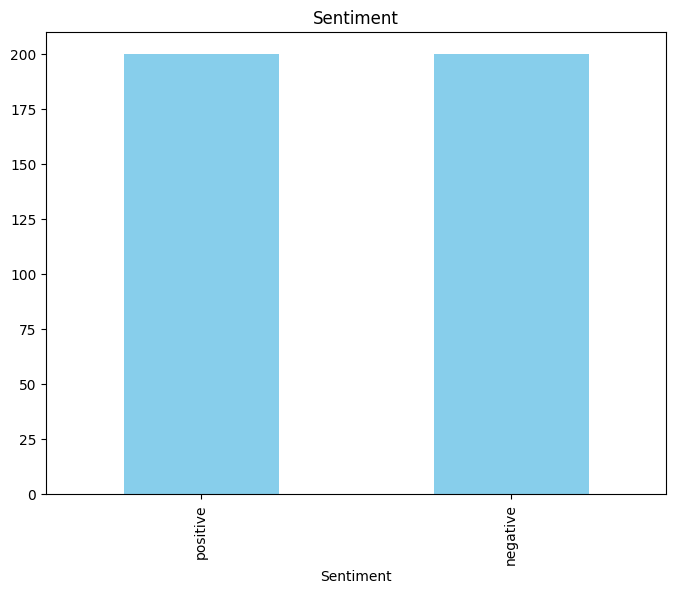

In [12]:
sentiment = data['Sentiment'].value_counts()
plt.figure(figsize=(8,6))
sentiment.plot(kind='bar',color='skyblue')

plt.title("Sentiment")
plt.show()

### Case Folding

In [13]:
data['Text Tweet'] = data['Text Tweet'].apply(lambda tweet: ' '.join(word for word in tweet.split() if not word.startswith('@')))
data['Text Tweet'] = data['Text Tweet'].apply(lambda tweet: ' '.join(word for word in tweet.split() if not word.startswith('http')))

In [14]:
data['Text Tweet']

0      Undang ke hitamputih, pemenang SSK JKT48 harus...
1      Selamat berbuka puasa Semoga amal ibadah hari ...
2      Ada nih di trans7 hitam putih, dia dpt penghar...
3                        selamat ya mas masuk hitamputih
4                      Asiknya nonton Hitam Putih Trans7
                             ...                        
395    ini apa banget deh gw paling kesel klo orang2 ...
396    Orang miskin semakin miskin klo sekolah melaku...
397    ga boLeh emosi, cepat tua, nonton #matanajwame...
398    dr penampilan saja kyk preman taunya bkin kisr...
399    Jawab aja ga usah berbelit-belit. Muter2 ga je...
Name: Text Tweet, Length: 400, dtype: object

In [15]:
def rm_special_char(comment):
  comment = comment.lower()
  comment = re.sub(r':', '', comment)
  comment = re.sub(r'[0-9]+', '', comment)
  comment = re.sub(r'\b[a-zA-Z]\b', '', comment)
  comment = comment.encode('ascii', 'replace').decode('ascii')
  comment = comment.translate(str.maketrans('', '', string.punctuation))
  return comment


data['Text Tweet'] = data['Text Tweet'].apply(rm_special_char)

In [16]:
data

,Id,Sentiment,Acara TV,Jumlah Retweet,Text Tweet
0,1,positive,HitamPutihTransTV,12,undang ke hitamputih pemenang ssk jkt harusnya...
1,2,positive,HitamPutihTransTV,6,selamat berbuka puasa semoga amal ibadah hari ...
2,3,positive,HitamPutihTransTV,9,ada nih di trans hitam putih dia dpt pengharga...
3,4,positive,HitamPutihTransTV,2,selamat ya mas masuk hitamputih
4,5,positive,HitamPutihTransTV,1,asiknya nonton hitam putih trans
...,...,...,...,...,...
395,396,negative,MataNajwaMetroTV,0,ini apa banget deh gw paling kesel klo orang p...
396,397,negative,MataNajwaMetroTV,0,orang miskin semakin miskin klo sekolah melaku...
397,398,negative,MataNajwaMetroTV,0,ga boleh emosi cepat tua nonton matanajwametro...
398,399,negative,MataNajwaMetroTV,0,dr penampilan saja kyk preman taunya bkin kisr...


## Data Preprocessing

### Tokenizing

In [17]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
data['Text Tweet'] = data['Text Tweet'].apply(word_tokenize)

In [19]:
data

,Id,Sentiment,Acara TV,Jumlah Retweet,Text Tweet
0,1,positive,HitamPutihTransTV,12,"[undang, ke, hitamputih, pemenang, ssk, jkt, h..."
1,2,positive,HitamPutihTransTV,6,"[selamat, berbuka, puasa, semoga, amal, ibadah..."
2,3,positive,HitamPutihTransTV,9,"[ada, nih, di, trans, hitam, putih, dia, dpt, ..."
3,4,positive,HitamPutihTransTV,2,"[selamat, ya, mas, masuk, hitamputih]"
4,5,positive,HitamPutihTransTV,1,"[asiknya, nonton, hitam, putih, trans]"
...,...,...,...,...,...
395,396,negative,MataNajwaMetroTV,0,"[ini, apa, banget, deh, gw, paling, kesel, klo..."
396,397,negative,MataNajwaMetroTV,0,"[orang, miskin, semakin, miskin, klo, sekolah,..."
397,398,negative,MataNajwaMetroTV,0,"[ga, boleh, emosi, cepat, tua, nonton, matanaj..."
398,399,negative,MataNajwaMetroTV,0,"[dr, penampilan, saja, kyk, preman, taunya, bk..."


### Normalization Typo

In [20]:
import pandas as pd

def unique_words_array(dataframe, column_name):
    unique_word_set = set()
    for text in dataframe[column_name]:
        unique_word_set.update(text)
    unique_words_array = list(unique_word_set)
    return unique_words_array

unique_words_array = unique_words_array(data, 'Text Tweet')
print(len(unique_words_array))
print(unique_words_array)

1647
['jkt', 'mendukung', 'kemanusiaan', 'perang', 'pssi', 'petir', 'setiap', 'mas', 'nyebelin', 'gajah', 'sehat', 'islami', 'kado', 'kickandy', 'jempol', 'masa', 'woidjojayanto', 'pekerja', 'hanya', 'faisal', 'diketawain', 'asal', 'indahnya', 'tanpa', 'tebang', 'tertipu', 'pembela', 'dg', 'dididik', 'bom', 'bebas', 'mengajarkan', 'bangkrut', 'merekamereka', 'yuk', 'dipikirin', 'msh', 'kejahatan', 'soleh', 'dirangkulnya', 'memojokan', 'pilihanku', 'pd', 'sarjana', 'academi', 'tempat', 'dah', 'rumahnya', 'peluang', 'mengeluarkan', 'duga', 'memberikan', 'sepatu', 'detik', 'whatsapp', 'rumania', 'pdhl', 'haha', 'boikot', 'ngantri', 'yakin', 'terbukti', 'suka', 'keringat', 'ayo', 'televisi', 'ketua', 'bakarin', 'bawa', 'akhlaq', 'bp', 'bu', 'sip', 'dibentuk', 'sehingga', 'wihh', 'mengejutkan', 'anggota', 'syafii', 'mengupayakan', 'nongol', 'hahahaha', 'belayar', 'tp', 'terbesar', 'pribadi', 'kegelapan', 'menembaki', 'gymnastiar', 'mencampakkan', 'insyaflahwahaimanusia', 'korupsi', 'minggua

In [21]:
# dict_kesalahan = {'Kata Salah': [], 'Pembenaran': []}

# for index, kata in enumerate(unique_words_array, start=1):
#     jawaban = input("{}  Masukkan pembenaran untuk kata '{}': ".format(index, kata))
#     if jawaban:
#         dict_kesalahan['Kata Salah'].append(kata)
#         dict_kesalahan['Pembenaran'].append(jawaban)

# df_kesalahan = pd.DataFrame(dict_kesalahan)

# print("\nKata yang salah dan pembenarannya:")
# print(df_kesalahan)

In [22]:
normalized_word = pd.read_csv('kamus.csv')
normalized_word_dict = dict(zip(normalized_word['Kata Salah'], normalized_word['Pembenaran']))

def normalized_term(document):
    return [normalized_word_dict[term] if term in normalized_word_dict else term for term in document]

data['Text Tweet'] = data['Text Tweet'].apply(normalized_term)
print(data['Text Tweet'])


0      [undang, ke, hitamputih, pemenang, ssk, jkt, h...
1      [selamat, berbuka, puasa, semoga, amal, ibadah...
2      [ada, ini, di, trans, hitam, putih, dia, dapat...
3                  [selamat, ya, mas, masuk, hitamputih]
4                 [asiknya, nonton, hitam, putih, trans]
                             ...                        
395    [ini, apa, banget, deh, saya, paling, kesel, j...
396    [orang, miskin, semakin, miskin, jika, sekolah...
397    [tidak, boleh, emosi, cepat, tua, nonton, mata...
398    [dari, penampilan, saja, seperti, preman, taun...
399    [jawab, saja, tidak, usah, berbelitbelit, mute...
Name: Text Tweet, Length: 400, dtype: object


In [ ]:
normalized_word = pd.read_csv('kamus.csv')
mormalized_word_dict = dict(zip(normalized_word['Kata Salah'], normalized_word['Pembenaran']))

def normalized(document):
    return [normalized_word_dict[term] if term in normalized_word_dict else term for term in document]

### Filtering

In [23]:

def stopword_removal(comment):
    factory = StopWordRemoverFactory()
    stopword = factory.create_stop_word_remover()
    return stopword.remove(' '.join(comment)).split()

data['Text Tweet'] = data['Text Tweet'].apply(stopword_removal)

### Stemming

In [24]:
def stemming(text):
  factory_stemming = StemmerFactory()
  stemmer = factory_stemming.create_stemmer()
  return ' '.join([stemmer.stem(comment) for comment in text])

data['Text Tweet'] = data['Text Tweet'].apply(stemming)
data

,Id,Sentiment,Acara TV,Jumlah Retweet,Text Tweet
0,1,positive,HitamPutihTransTV,12,undang hitamputih menang ssk jkt harus jkt leb...
1,2,positive,HitamPutihTransTV,6,selamat buka puasa moga amal ibadah hari ni te...
2,3,positive,HitamPutihTransTV,9,ini trans hitam putih dapat harga di norwegia ...
3,4,positive,HitamPutihTransTV,2,selamat mas masuk hitamputih
4,5,positive,HitamPutihTransTV,1,asiknya nonton hitam putih trans
...,...,...,...,...,...
395,396,negative,MataNajwaMetroTV,0,apa banget deh paling kesel orang debat pakai ...
396,397,negative,MataNajwaMetroTV,0,orang miskin makin miskin sekolah laku pungut ...
397,398,negative,MataNajwaMetroTV,0,boleh emosi cepat tua nonton matanajwametrotv ...
398,399,negative,MataNajwaMetroTV,0,tampil seperti preman tau buat kisruh usak mat...


### TF-IDF


In [25]:
import numpy as np

class CustomTfidfVectorizer:
    def __init__(self):
        self.vocab = {}
        self.idf = {}
        self.doc_count = 0

    def fit(self, corpus):
        doc_term_freqs = []
        for doc in corpus:
            term_freqs = {}
            for term in doc.split():
                if term in term_freqs:
                    term_freqs[term] += 1
                else:
                    term_freqs[term] = 1
            doc_term_freqs.append(term_freqs)
            self.doc_count += 1

            for term in term_freqs:
                if term not in self.vocab:
                    self.vocab[term] = len(self.vocab)

        for term in self.vocab:
            doc_freq = sum(1 for doc in doc_term_freqs if term in doc)
            self.idf[term] = np.log(self.doc_count / (doc_freq + 1)) + 1  # Add 1 to avoid division by zero

    def transform(self, corpus):
        rows = []
        cols = []
        values = []

        for i, doc in enumerate(corpus):
            term_freqs = {}
            for term in doc.split():
                if term in term_freqs:
                    term_freqs[term] += 1
                else:
                    term_freqs[term] = 1
            doc_length = sum(term_freqs.values())

            for term, freq in term_freqs.items():
                if term in self.vocab:
                    rows.append(i)
                    cols.append(self.vocab[term])
                    tfidf = (freq / doc_length) * self.idf[term]
                    values.append(tfidf)

        matrix = np.zeros((len(corpus), len(self.vocab)))
        for row, col, value in zip(rows, cols, values):
            matrix[row, col] = value
        return matrix / np.linalg.norm(matrix, axis=1, keepdims=True)  # Normalize rows to unit Euclidean length

# Usage
documents = data['Text Tweet']
vectorizer = CustomTfidfVectorizer()
vectorizer.fit(documents)
tfidf_matrix = vectorizer.transform(documents)
print(tfidf_matrix)


[[0.42145128 0.22240171 0.27137926 ... 0.         0.         0.        ]
 [0.         0.25957895 0.         ... 0.         0.         0.        ]
 [0.         0.33100275 0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.35673042 0.35673042 0.35673042]]


In [26]:

min_value = np.min(tfidf_matrix)
max_value = np.max(tfidf_matrix)

print("Rentang nilai dalam tfidf_matrix:")
print("Nilai Minimum:", min_value)
print("Nilai Maksimum:", max_value)


Rentang nilai dalam tfidf_matrix:
Nilai Minimum: 0.0
Nilai Maksimum: 0.8854722176406615


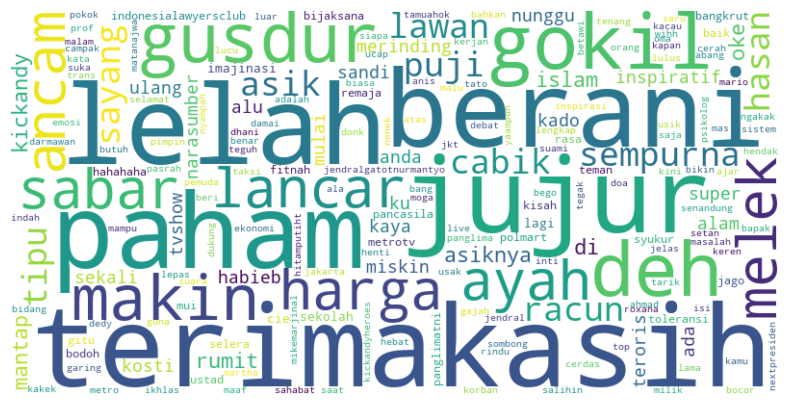

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Extract the most important terms
important_terms = {}
for term, index in vectorizer.vocab.items():
    tfidf_scores = tfidf_matrix[:, index]
    max_tfidf_score = max(tfidf_scores)
    important_terms[term] = max_tfidf_score

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(important_terms)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [28]:
print(len(tfidf_matrix))

400


### Train Test Split

In [29]:
# import numpy as np

# def train_test_split(x, y, test_size=0.2, random_state=None):
#     if random_state is not None:
#         np.random.seed(random_state)
#     total_samples = x.shape[0]
#     indices = np.arange(total_samples)
#     np.random.shuffle(indices)
#     split_index = int(total_samples * (1 - test_size))
#     X_train = x[indices[:split_index]]
#     X_test = x[indices[split_index:]]
#     y_train = y.iloc[indices[:split_index]]
#     y_test = y.iloc[indices[split_index:]]
#     return X_train, X_test, y_train, y_test

In [30]:
import numpy as np

def train_test_split(x, y, test_size=0.2, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)
    indices = np.random.permutation(len(x))
    split_index = int(len(x) * (1 - test_size))
    return x[indices[:split_index]], x[indices[split_index:]], y.iloc[indices[:split_index]], y.iloc[indices[split_index:]] 


In [31]:
data['Sentiment'] = data['Sentiment'].replace({'positive' : 0, 'negative' : 1})

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4048\275599533.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Sentiment'] = data['Sentiment'].replace({'positive' : 0, 'negative' : 1})


In [32]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, data['Sentiment'], test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Length of y_train:", len(y_train))
print("Length of y_test:", len(y_test))


Shape of X_train: (320, 1235)
Shape of X_test: (80, 1235)
Length of y_train: 320
Length of y_test: 80


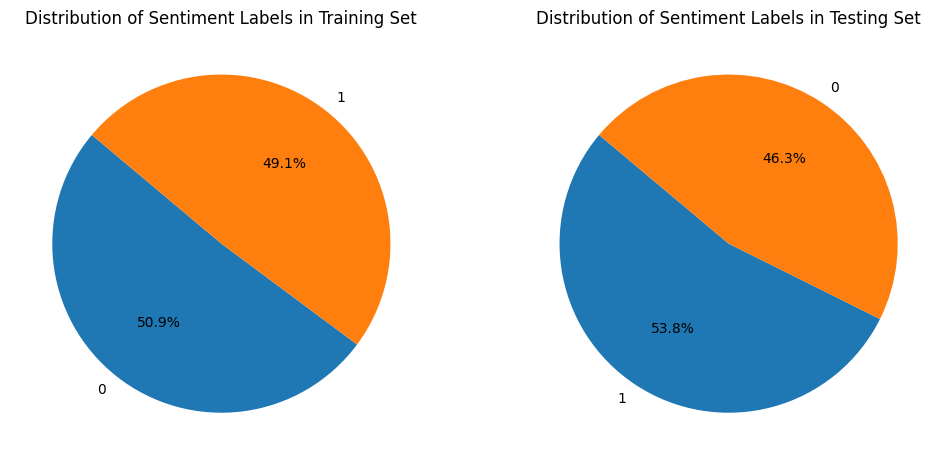

In [33]:
train_sentiment_counts = y_train.value_counts()
test_sentiment_counts = y_test.value_counts()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].pie(train_sentiment_counts, labels=train_sentiment_counts.index, autopct='%1.1f%%', startangle=140)
axes[0].set_title('Distribution of Sentiment Labels in Training Set')

axes[1].pie(test_sentiment_counts, labels=test_sentiment_counts.index, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Distribution of Sentiment Labels in Testing Set')

plt.show()

In [34]:
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [35]:
data['Sentiment'].value_counts()

Sentiment
0    200
1    200
Name: count, dtype: int64

## Modelling

In [36]:
import numpy as np

class CustomKNNClassifier:
    def __init__(self, k):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        y_pred = []
        for x in X_test:
            distances = np.sqrt(np.sum((self.X_train - x) ** 2, axis=1))  # Euclidean distance
            nearest_neighbors = np.argsort(distances)[:self.k]  # Indices of k nearest neighbors
            nearest_labels = self.y_train[nearest_neighbors]  # Labels of k nearest neighbors
            unique_labels, counts = np.unique(nearest_labels, return_counts=True)
            predicted_label = unique_labels[np.argmax(counts)]
            y_pred.append(predicted_label)
        return np.array(y_pred)

In [37]:
def predict(self, X_test):
    y_pred = []
    for x in X_test:
        distances = np.sqrt

In [38]:
print(X_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [39]:
knn_classifier = CustomKNNClassifier(k=3)
knn_classifier.fit(X_train, y_train)

# Predict
predictions = knn_classifier.predict(X_train)
predictions

array([0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,

In [40]:
print(len(X_test))
print(len(y_test))

80
80


In [41]:
# Import library yang diperlukan
import numpy as np

# Fungsi untuk menghitung akurasi
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

# Fungsi untuk menghitung confusion matrix
def confusion_matrix(y_true, y_pred):
    classes = np.unique(np.concatenate((y_true, y_pred)))
    matrix = np.zeros((len(classes), len(classes)), dtype=int)
    for i in range(len(y_true)):
        matrix[y_true[i]][y_pred[i]] += 1
    return matrix

In [42]:
def confusion_matrix(y_true, y_pred):
    classes = np.unique(np.concatenate((y_true, y_pred)))
    matrix = np.zeros((len(classes), len(classes)), dtype=int)
    for i in range(len(y_true)):
        matrix[y_true[i]][y_pred[i]] +=1
    return matrix

In [ ]:
def confusion_matrix(y_true, y_pred):
    classes = np.unique(np.concatenate(y_true, y_pred))
    matrix = np.zeros((len(classes), len(classes)), dtype=int)
    for i in range(len(y_true)):
        matrix[y_true[i]][y_pred[i]]+=1
    return matrix 

In [ ]:
normalized_word = pd.read_excel('kamus.csv')
normalized_word_dict = dict(zip(normalized_word['koer'], normalized_word['ror']))

def normalized(document):
    return [normalized_word_dict[term] if term in normalized_word_dict else term for term in document]

In [43]:
predictions

array([0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,

In [44]:
# Hitung akurasi
acc = accuracy(y_train, predictions)
print("Accuracy:", acc)

# Hitung confusion matrix
cm = confusion_matrix(y_train, predictions)
print("Confusion Matrix:")
print(cm)

Accuracy: 0.915625
Confusion Matrix:
[[157   6]
 [ 21 136]]


In [45]:
cm = confusion_matrix(y_test, predictions)

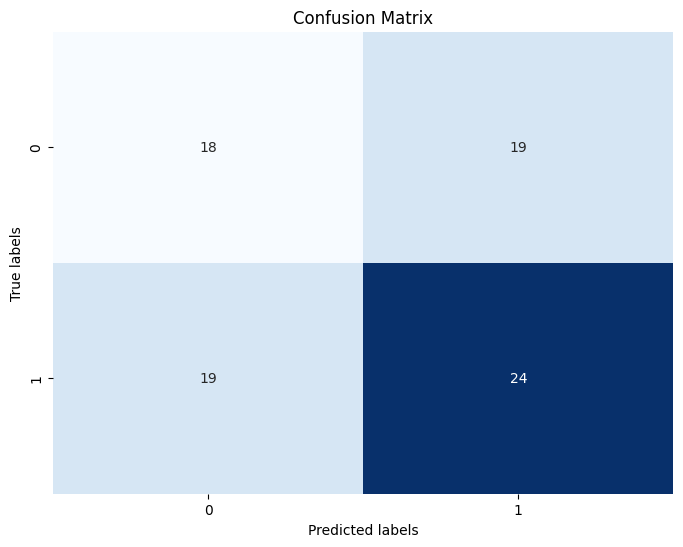

In [56]:
# Membuat visualisasi menggunakan seaborn
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## Testing

In [47]:
# Sample text for testing
def preprocess_tweet(tweet):
    tweet = ' '.join(word for word in tweet.split() if not word.startswith('@'))
    tweet = ' '.join(word for word in tweet.split() if not word.startswith('http'))
    tweet = rm_special_char(tweet)
    tweet = word_tokenize(tweet)
    tweet = stopword_removal(tweet)
    tweet = stemming(tweet)
    return tweet

def testing(test_text):
  tfidf_test = vectorizer.transform([test_text])
  predicted_sentiment = knn_classifier.predict(tfidf_test)
  if predicted_sentiment == 0:
      print("Predicted Sentiment: Positive")
  else:
      print("Predicted Sentiment: Negative")


txt = input('Enter: ')
txt = preprocess_tweet(txt)
testing(txt)

Predicted Sentiment: Negative


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4048\2415402210.py:53: RuntimeWarning: invalid value encountered in divide
  return matrix / np.linalg.norm(matrix, axis=1, keepdims=True)  # Normalize rows to unit Euclidean length


In [48]:
import streamlit as st
def main():
    st.title("Sentiment Analysis")
    text_input = st.text_input("Enter a tweet:")
    if st.button("Analyze"):
        processed_text = preprocess_tweet(text_input)
        result = testing(processed_text)
        st.write(result)

if __name__ == "__main__":
    main()

2024-04-24 03:36:53.581 
  command:

    streamlit run C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\ipykernel_launcher.py [ARGUMENTS]
